In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats 

# 1

In [3]:
np.random.seed(42069)

In [4]:
def getTrajectory(time):
    a = 4
    p =2 
    lamb = 10

    cnt = np.random.poisson(lamb*time)
    starting = np.random.uniform(0,time,cnt)
    ending = starting+np.random.gamma(p,1/a,cnt)
    ending = ending[np.where(ending < time)]

    eventlist = []

    for i in starting:
        eventlist.append((i,'S'))
    for i in ending:
        eventlist.append((i,'E'))

    eventlist.sort()

    trajectory = {}
    currcount = 0

    for i in eventlist:
        if i[1] == 'S':
            currcount += 1
        else:
            currcount -= 1
        trajectory[i[0]] = currcount
    return trajectory

Text(0, 0.5, 'Počet zákazníků (n)')

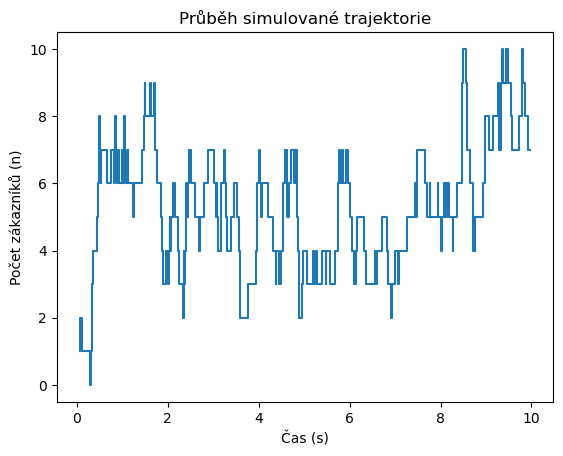

In [5]:
trajectory = getTrajectory(10)
plt.step(list(trajectory.keys()),list(trajectory.values()))
plt.title("Průběh simulované trajektorie")
plt.xlabel("Čas (s)")
plt.ylabel("Počet zákazníků (n)")

# 2

In [6]:
customerCounts = []
for i in range(500):
    customerCounts.append(list(getTrajectory(100).items()).pop()[1])

Text(0, 0.5, 'Četnost')

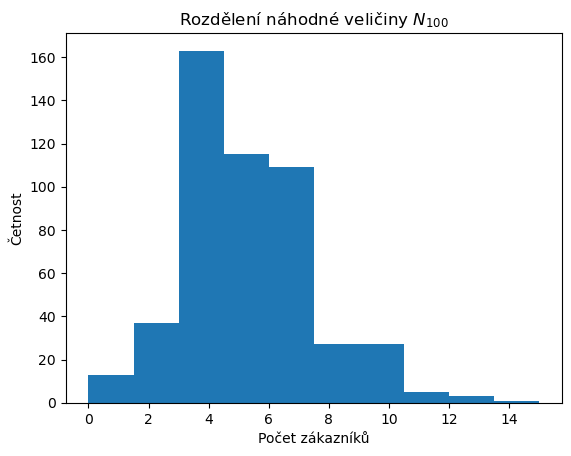

In [7]:
plt.hist(customerCounts)
plt.title("Rozdělení náhodné veličiny $N_{100}$")
plt.xlabel("Počet zákazníků")
plt.ylabel("Četnost")

In [8]:
countArr = np.array(customerCounts)
print("Mean:",countArr.mean())
print("Var:",countArr.var(ddof=1))

Mean: 5.012
Var: 4.721298597194389


POuzijeme parametry abysme porovnali s poisson a normalnim rozdelenim se stejnymi parametry

Text(0, 0.5, 'Četnost')

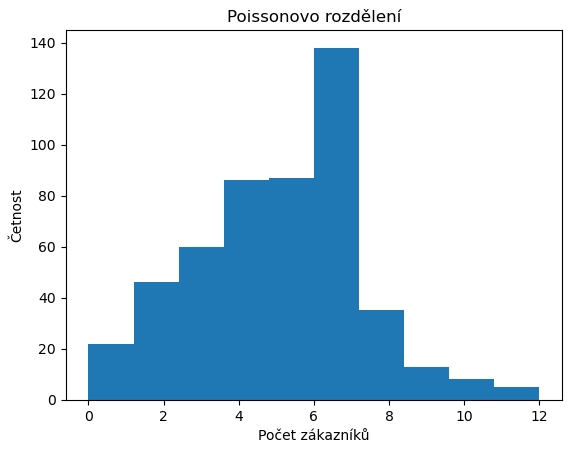

In [9]:
plt.hist(np.random.poisson(countArr.mean(), 500))
plt.title("Poissonovo rozdělení")
plt.xlabel("Počet zákazníků")
plt.ylabel("Četnost")

Text(0, 0.5, 'Četnost')

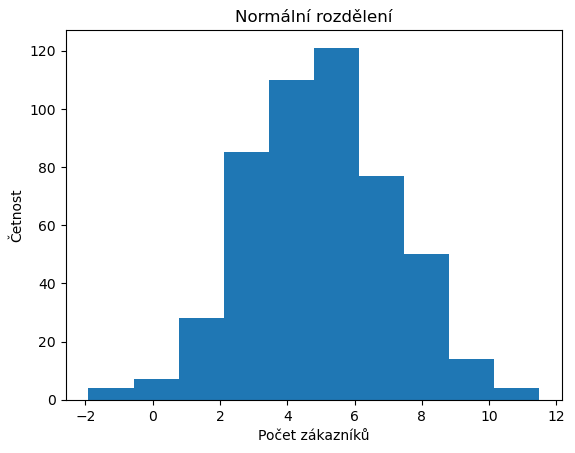

In [10]:
plt.hist(np.random.normal(countArr.mean(),countArr.std(), 500))
plt.title("Normální rozdělení")
plt.xlabel("Počet zákazníků")
plt.ylabel("Četnost")

# 3

In [11]:
poisson_items = np.random.poisson(5, 500)

poisson_freqs = np.unique(poisson_items,return_counts=True)[1]
poisson_freqs = poisson_freqs/poisson_freqs.sum()

In [12]:
poisson_freqs

array([0.012, 0.034, 0.086, 0.148, 0.194, 0.154, 0.132, 0.108, 0.056,
       0.044, 0.02 , 0.006, 0.002, 0.002, 0.002])

In [13]:
countArr_freqs = np.unique(countArr, return_counts=True)[1]
countArr_freqs =  countArr_freqs/countArr_freqs.sum()

In [14]:
allCusts = countArr.sum()
allCusts

2506

In [15]:
print(scipy.stats.chisquare(countArr_freqs*allCusts, poisson_freqs*allCusts))


Power_divergenceResult(statistic=165.49828395158974, pvalue=5.546416488786345e-28)


In [18]:
bins =  len(countArr_freqs)
print(f'Bins: {bins}\nchi2: {scipy.stats.chi2.ppf(1-0.05,bins-1)}')

Bins: 15
chi2: 23.684791304840576
